<p>
    <img src='utils/digrams/eda_digram.png' width='1000'>
</p>

# Taxi Trip Duratoin

### Understanding Featrues/Data

This EDA for ***New York City Taxi Trip Duration*** project inspired by kaggle project to calculate the total duration for taxi driving in New York

* from Kaggle  

***id*** - a unique identifier for each trip
  
***vendor_id*** - a code indicating the provider associated with the trip record  

***dropoff_datetime*** - date and time when the meter was disengaged  

***passenger_count*** - the number of passengers in the vehicle (driver entered value)  

***pickup_longitude*** - the longitude where the meter was engaged  

***pickup_latitude*** - the latitude where the meter was engaged  

***dropoff_longitude*** - the longitude where the meter was disengaged  

***dropoff_latitude*** - the latitude where the meter was disengaged  

***store_and_fwd_flag*** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip  

***trip_duration*** - duration of the trip in seconds

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

In [2]:

train_data = pd.read_csv(r'split/train.csv')
val_data = pd.read_csv(r'split/val.csv')

df = pd.concat([train_data,val_data], ignore_index=True)
df.shape

(1229319, 10)

In [3]:
df.to_csv('train_val.csv', index=False)

In [190]:
df.head()

id  vendor_id      pickup_datetime  passenger_count  \
0  id2793718          2  2016-06-08 07:36:19                1   
1  id3485529          2  2016-04-03 12:58:11                1   
2  id1816614          2  2016-06-05 02:49:13                5   
3  id1050851          2  2016-05-05 17:18:27                2   
4  id0140657          1  2016-05-12 17:43:38                4   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.985611        40.735943         -73.980331         40.760468   
1        -73.978394        40.764351         -73.991623         40.749859   
2        -73.989059        40.744389         -73.973381         40.748692   
3        -73.990326        40.731136         -73.991264         40.748917   
4        -73.789497        40.646675         -73.987137         40.759232   

  store_and_fwd_flag  trip_duration  
0                  N           1040  
1                  N            827  
2                  N            614  
3                  N            867  
4                  N           4967

In [191]:
df.drop('id',axis=1,inplace=True)
df.head()

vendor_id      pickup_datetime  passenger_count  pickup_longitude  \
0          2  2016-06-08 07:36:19                1        -73.985611   
1          2  2016-04-03 12:58:11                1        -73.978394   
2          2  2016-06-05 02:49:13                5        -73.989059   
3          2  2016-05-05 17:18:27                2        -73.990326   
4          1  2016-05-12 17:43:38                4        -73.789497   

   pickup_latitude  dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0        40.735943         -73.980331         40.760468                  N   
1        40.764351         -73.991623         40.749859                  N   
2        40.744389         -73.973381         40.748692                  N   
3        40.731136         -73.991264         40.748917                  N   
4        40.646675         -73.987137         40.759232                  N   

   trip_duration  
0           1040  
1            827  
2            614  
3            867  
4           4967

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229319 entries, 0 to 1229318
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1229319 non-null  int64  
 1   pickup_datetime     1229319 non-null  object 
 2   passenger_count     1229319 non-null  int64  
 3   pickup_longitude    1229319 non-null  float64
 4   pickup_latitude     1229319 non-null  float64
 5   dropoff_longitude   1229319 non-null  float64
 6   dropoff_latitude    1229319 non-null  float64
 7   store_and_fwd_flag  1229319 non-null  object 
 8   trip_duration       1229319 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 84.4+ MB


In [193]:
df.describe().T

count        mean          std         min         25%  \
vendor_id          1229319.0    1.534912     0.498780    1.000000    1.000000   
passenger_count    1229319.0    1.664531     1.314509    0.000000    1.000000   
pickup_longitude   1229319.0  -73.973446     0.061780 -121.933342  -73.991852   
pickup_latitude    1229319.0   40.750928     0.033545   34.359695   40.737370   
dropoff_longitude  1229319.0  -73.973395     0.061641 -121.933304  -73.991325   
dropoff_latitude   1229319.0   40.751816     0.036341   32.181141   40.735901   
trip_duration      1229319.0  959.691748  5263.573404    1.000000  397.000000   

                          50%          75%           max  
vendor_id            2.000000     2.000000  2.000000e+00  
passenger_count      1.000000     2.000000  8.000000e+00  
pickup_longitude   -73.981728   -73.967346 -6.133553e+01  
pickup_latitude     40.754108    40.768360  5.188108e+01  
dropoff_longitude  -73.979759   -73.963028 -6.133553e+01  
dropoff_latitude    40.754532    40.769821  4.392103e+01  
trip_duration      662.000000  1075.000000  3.526282e+06

In [194]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [195]:
numerical_data=[]

for col in df.columns:
    if df[col].dtype!='O':
        numerical_data.append(col)

df[numerical_data].skew()

vendor_id             -0.139992
passenger_count        2.128098
pickup_longitude    -369.522254
pickup_latitude        7.053077
dropoff_longitude   -376.640662
dropoff_latitude     -22.953668
trip_duration        359.513843
dtype: float64

In [196]:
print(df.isna().sum().sum())

0


In [197]:
df.duplicated().sum()

np.int64(6)

In [198]:
dub = df[df.duplicated()]
dub.head()

vendor_id      pickup_datetime  passenger_count  pickup_longitude  \
315537           2  2016-05-04 14:54:59                4        -73.958336   
446126           2  2016-03-05 18:22:41                2        -73.997292   
625632           2  2016-01-21 12:04:53                3        -73.800667   
973226           2  2016-02-16 21:36:35                2        -74.008034   
1022753          2  2016-03-06 10:06:31                4        -73.997055   

         pickup_latitude  dropoff_longitude  dropoff_latitude  \
315537         40.800922         -73.959106         40.801910   
446126         40.691071         -73.999428         40.683388   
625632         40.645954         -73.985809         40.763363   
973226         40.723553         -74.008034         40.723553   
1022753        40.737183         -73.991913         40.734577   

        store_and_fwd_flag  trip_duration  
315537                   N            149  
446126                   N            149  
625632                   N           5413  
973226                   N             31  
1022753                  N          85954

let's check outliers

In [199]:
columns = ['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','trip_duration']

for col in columns:
       q1 = df[col].quantile(0.25)
       q3 = df[col].quantile(0.75)
       iqr = q3-q1
       lower = q1-1.5*iqr
       upper = q3+1.5*iqr
       mask = df[(df[col]<lower) | (df[col]>upper)]
       if not mask.empty:
              print(f'{col} has {mask.shape[0]} example outlier')

print(df.shape)


passenger_count has 130523 example outlier
pickup_longitude has 71098 example outlier
pickup_latitude has 44554 example outlier
dropoff_longitude has 65927 example outlier
dropoff_latitude has 60532 example outlier
trip_duration has 62440 example outlier
(1229319, 9)


In [201]:
columns = df.select_dtypes(include=np.number).columns

for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    df[col] = df[col].clip(lower, upper)

print(df.shape)


(1229319, 9)


In [203]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

print(f"Input Features Shape : {X.shape}")
print(f"Target Feature shape : {Y.shape}")

Input Features Shape : (1229319, 8)
Target Feature shape : (1229319,)


In [204]:
Y_log = np.log1p(Y)
Y_log.skew()

np.float64(-0.8544040306493124)

In [205]:
df['log_trip_duration'] = Y_log
Y_log.head()

0    6.947937
1    6.719013
2    6.421622
3    6.766192
4    7.646354
Name: trip_duration, dtype: float64

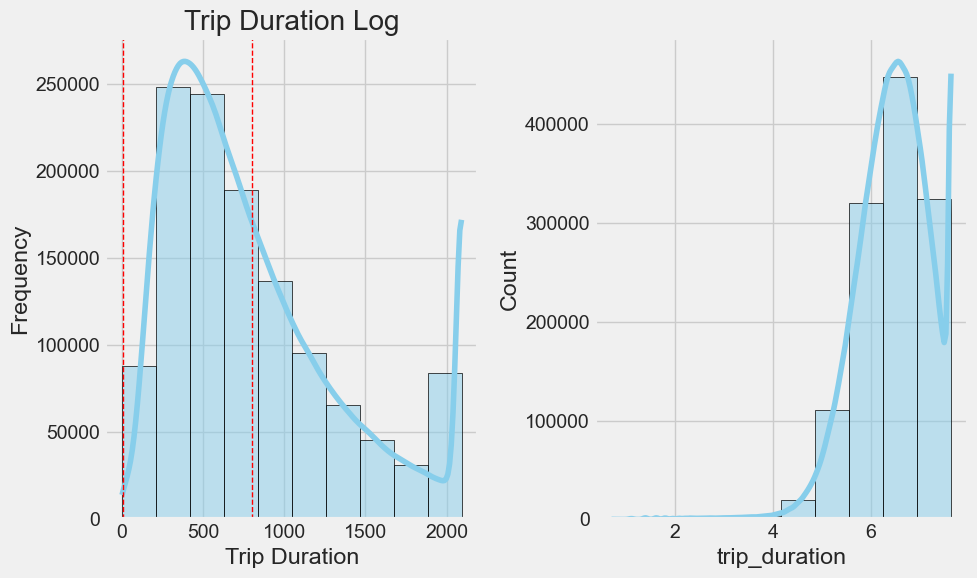

In [206]:
fig,axes = plt.subplots(1,2, figsize=(10,6))

sns.histplot(Y, kde=True, bins=10, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title("Trip Duration Origion")
axes[0].set_xlabel("Trip Duration")
axes[0].set_ylabel("Frequency")
axes[0].axvline(Y.mean(), color='red', linestyle='dashed',linewidth=1, label='Mean')

sns.histplot(Y_log, kde=True, bins=10, color='skyblue', edgecolor='black', ax=axes[1])
axes[0].set_title("Trip Duration Log")
axes[0].set_xlabel("Trip Duration")
axes[0].set_ylabel("Frequency")
axes[0].axvline(Y_log.mean(), color='red', linestyle='dashed',linewidth=1, label='Mean')


plt.tight_layout()
plt.show()

In [207]:
int_features, float_features = [], []

for col in X.columns:
    if X[col].dtype=='int64':
        int_features.append(col)
    if X[col].dtype=='float64':
        float_features.append(col)

print(X[int_features].shape)
print(X[float_features].shape)

(1229319, 1)
(1229319, 5)


In [208]:
X[int_features].head()

vendor_id
0          2
1          2
2          2
3          2
4          1

In [209]:
X['vendor_id'].value_counts()

vendor_id
2    657578
1    571741
Name: count, dtype: int64

In [210]:
vendor_group = df.groupby('vendor_id')['trip_duration'].mean()
vendor_group =  vendor_group.reset_index()
vendor_group.head()

vendor_id  trip_duration
0          1     794.222638
1          2     805.993548

In [211]:
X['passenger_count'].value_counts()

passenger_count
1.0    871202
2.0    177073
3.5    130523
3.0     50470
0.0        51
Name: count, dtype: int64

In [212]:
passengers_group = df.groupby('passenger_count')['trip_duration'].mean()
passengers_group = passengers_group.reset_index()
passengers_group.sort_values(by='trip_duration', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds', subset=['trip_duration'])


C:\Users\AhmedDiab\AppData\Local\Temp\ipykernel_3772\2073454832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendor_group, x='vendor_id', y='trip_duration', palette='Reds', ax=axes[0])
C:\Users\AhmedDiab\AppData\Local\Temp\ipykernel_3772\2073454832.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=passengers_group, x='passenger_count',y='trip_duration', palette='Reds' , ax=axes[1])


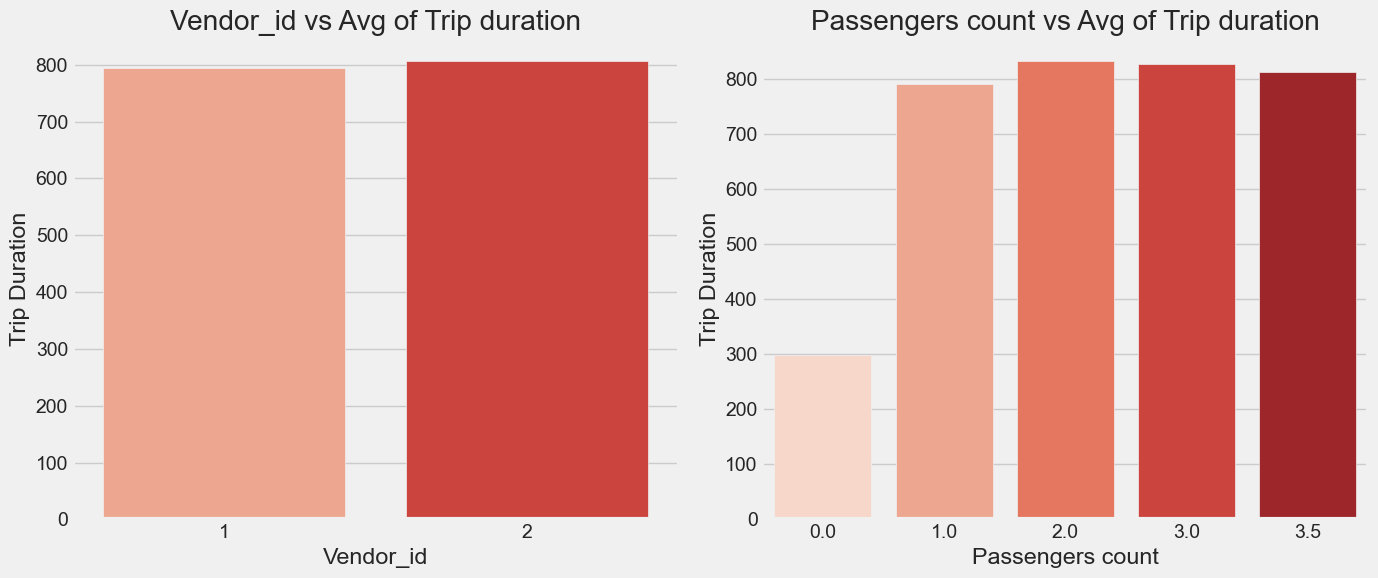

In [213]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.barplot(data=vendor_group, x='vendor_id', y='trip_duration', palette='Reds', ax=axes[0])
axes[0].set_title("Vendor_id vs Avg of Trip duration")
axes[0].set_xlabel("Vendor_id")
axes[0].set_ylabel("Trip Duration")

sns.barplot(data=passengers_group, x='passenger_count',y='trip_duration', palette='Reds' , ax=axes[1])
axes[1].set_title("Passengers count vs Avg of Trip duration")
axes[1].set_xlabel("Passengers count")
axes[1].set_ylabel("Trip Duration")


plt.tight_layout()
plt.show()


In [214]:
matrix = df[['vendor_id', 'passenger_count','log_trip_duration']]
matrix.head()

vendor_id  passenger_count  log_trip_duration
0          2              1.0           6.947937
1          2              1.0           6.719013
2          2              3.5           6.421622
3          2              2.0           6.766192
4          1              3.5           7.646354

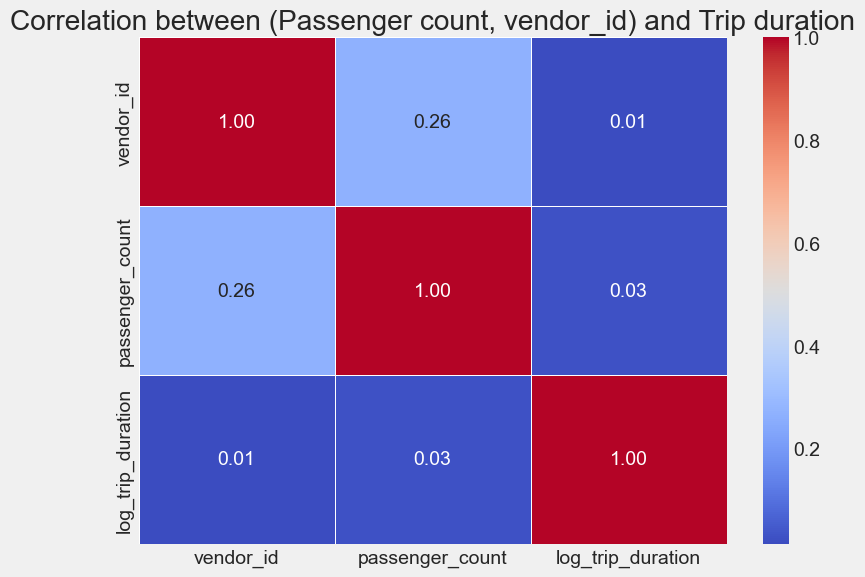

In [215]:
corr_matrix = matrix.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between (Passenger count, vendor_id) and Trip duration')
plt.tight_layout()
plt.show()


In [216]:
float_features

['passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

In [217]:
df[float_features].skew()

passenger_count      1.499448
pickup_longitude     0.660734
pickup_latitude     -0.326887
dropoff_longitude    0.685395
dropoff_latitude    -0.219416
dtype: float64

In [218]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = StandardScaler()

df[float_features] = mms.fit_transform(df[float_features])
df[float_features].skew()

passenger_count      1.499448
pickup_longitude     0.660734
pickup_latitude     -0.326887
dropoff_longitude    0.685395
dropoff_latitude    -0.219416
dtype: float64

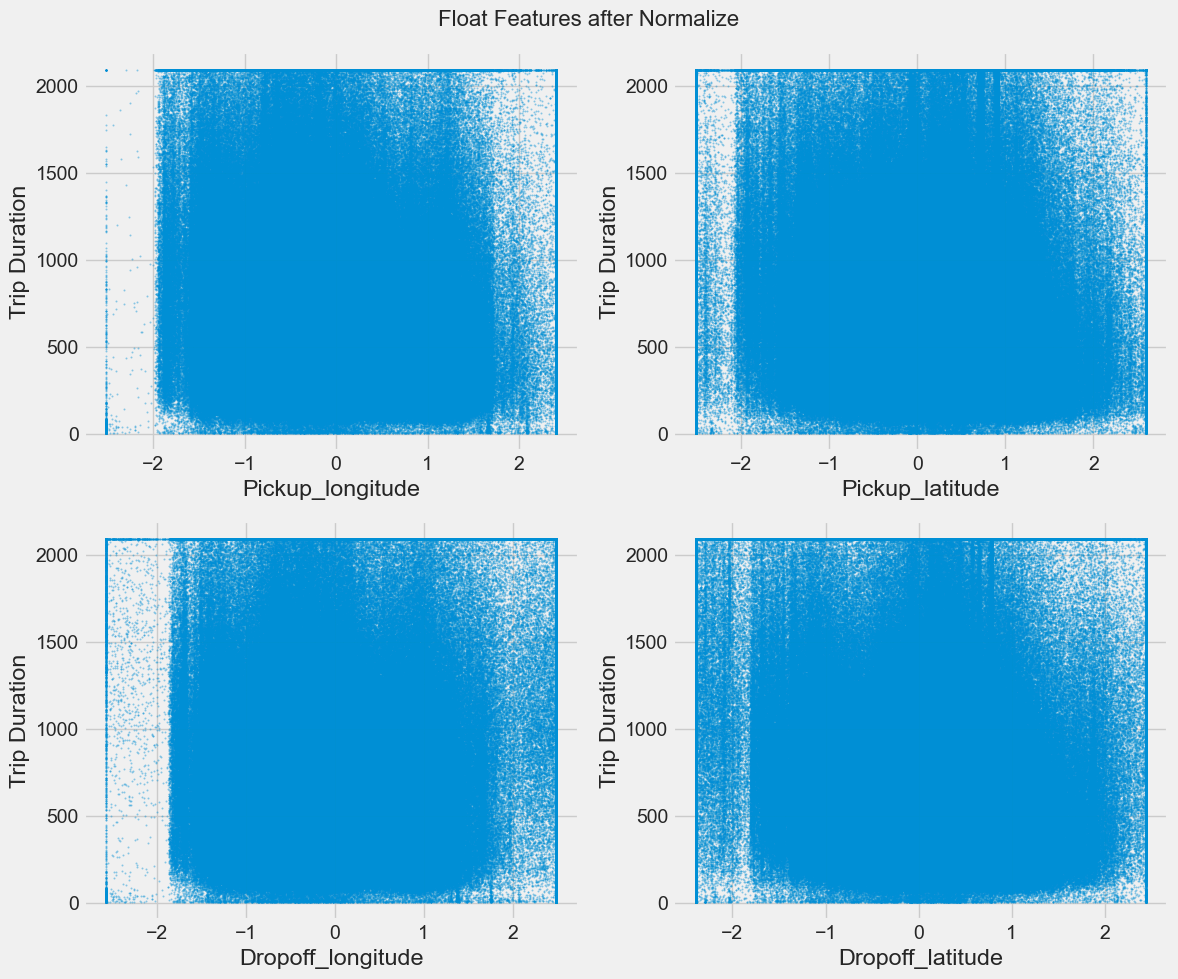

In [232]:
float_plot = float_features[1:]

plt.figure(figsize=(12,10))

for i in range(4):
    plt.subplot(2,2, i+1)
    plt.scatter(df[float_plot[i]], df['trip_duration'], s=1, alpha=0.3)
    plt.xlabel(f'{float_plot[i].capitalize()}')
    plt.ylabel('Trip Duration')

plt.suptitle('Float Features after Normalize', fontsize=16)
plt.tight_layout()
plt.show()

as we have ***pickup_longitude***, ***pickup_latitude***, ***dropoff_longitude***, and ***dropoff_latitude***  
we can find Haversine distance

In [233]:

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1,lon1,lat2,lon2])
    dlat = lat2-lat1
    dlon = lon2-lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*(np.sin(dlon/2)**2)

    d = 2*R*np.arcsin(np.sqrt(a))
    return d

df['haversine_distance'] = haversine(df['pickup_latitude'], df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
df['haversine_distance']

0          107.655360
1          101.592294
2           75.954954
3           82.650646
4          444.919151
              ...    
1229314    119.836904
1229315    259.903974
1229316    114.118818
1229317     53.835823
1229318     97.739913
Name: haversine_distance, Length: 1229319, dtype: float64

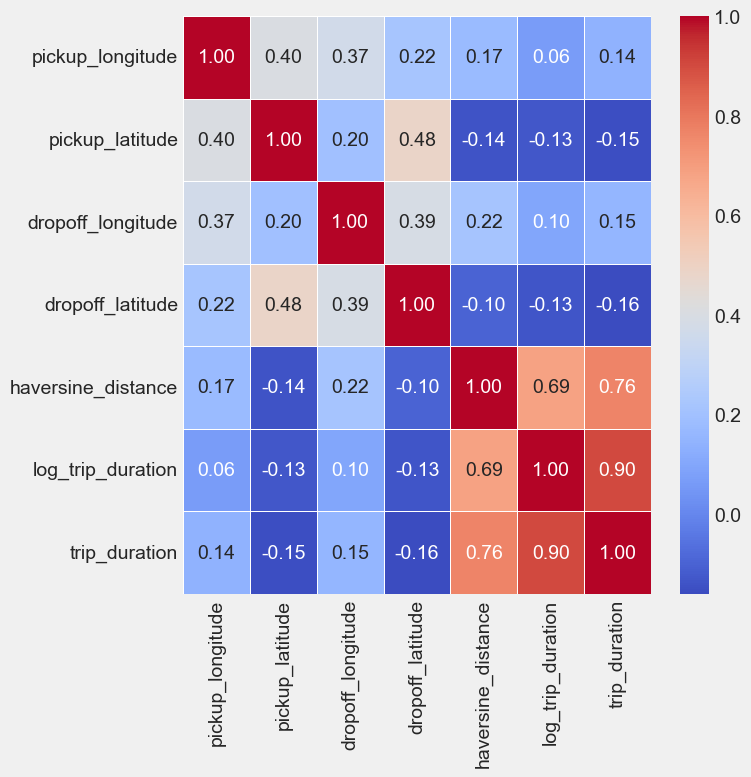

In [235]:
matrix = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','haversine_distance','log_trip_duration', 'trip_duration']]
corr_matrix = matrix.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()


the longitude, latitude negatively affected over the origin features

In [236]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1222501
Y       6818
Name: count, dtype: int64

In [237]:
from sklearn.preprocessing import LabelEncoder

feat = 'store_and_fwd_flag'

le = LabelEncoder()

df[feat] = le.fit_transform(df[feat])

df[feat].head()


0    0
1    0
2    0
3    0
4    0
Name: store_and_fwd_flag, dtype: int64

In [238]:
print(df[col].value_counts())
print()
store_fwd_group = df.groupby('store_and_fwd_flag')['trip_duration'].mean()
store_fwd_group = store_fwd_group.reset_index()

store_fwd_group.sort_values(by='trip_duration', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds',subset=['trip_duration'])

store_and_fwd_flag
0    1222501
1       6818
Name: count, dtype: int64



although when the trip is not stored or forward is 197 times over when it stored  
the average of duration when stored is bigger than when not stored

In [239]:
df['pickup_datetime'].head(20)

0     2016-06-08 07:36:19
1     2016-04-03 12:58:11
2     2016-06-05 02:49:13
3     2016-05-05 17:18:27
4     2016-05-12 17:43:38
5     2016-04-14 12:17:42
6     2016-03-17 21:10:43
7     2016-02-05 06:43:21
8     2016-03-22 14:08:02
9     2016-03-29 23:32:47
10    2016-06-13 22:40:11
11    2016-02-02 08:10:25
12    2016-04-14 18:29:44
13    2016-02-21 02:02:26
14    2016-04-18 20:45:20
15    2016-02-14 08:32:03
16    2016-05-16 16:24:41
17    2016-03-12 19:13:40
18    2016-03-14 10:19:47
19    2016-06-17 00:54:50
Name: pickup_datetime, dtype: object

this column show the date and time when the taxi start driving

we can extract features from this feature like ***Day***, ***Month***, ***Year***, ***Hour***, ***Seasons***  
and see what effectness

In [240]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime'].dtype

dtype('<M8[ns]')

In [241]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour
df['day_name'] = df['pickup_datetime'].dt.day_name()

In [242]:
most_days_duration = df.groupby(['day_name'])['trip_duration'].count().reset_index().sort_values(by='trip_duration', ascending=False)
most_days_duration

day_name  trip_duration
0     Friday         188105
2   Saturday         186280
4   Thursday         184179
6  Wednesday         177142
5    Tuesday         170789
3     Sunday         164905
1     Monday         157919

In [243]:
most_hour_duration = df.groupby(['hour'])['trip_duration'].count().reset_index().sort_values(by='trip_duration', ascending=False)
most_hour_duration[:10]

hour  trip_duration
18    18          76388
19    19          76018
21    21          71013
20    20          70922
22    22          67691
17    17          64451
14    14          62576
12    12          60495
15    15          60454
13    13          60262

In [244]:
def getseason(month):
    if 4<=month<=7:
        return 'Sprint'
    elif 8<=month<=10:
        return 'Summar'
    elif 11<=month<=12:
        return 'Fall'
    else:
        return 'Winter'

df['season'] = df['pickup_datetime'].dt.month.apply(getseason)
df['season'].head(10)

0    Sprint
1    Sprint
2    Sprint
3    Sprint
4    Sprint
5    Sprint
6    Winter
7    Winter
8    Winter
9    Winter
Name: season, dtype: object

In [245]:
dt_df = df[['year','month','day_of_week','hour','season']]
dt_df.head()


year  month  day_of_week  hour  season
0  2016      6            2     7  Sprint
1  2016      4            6    12  Sprint
2  2016      6            6     2  Sprint
3  2016      5            3    17  Sprint
4  2016      5            3    17  Sprint

In [246]:
from sklearn.preprocessing import LabelEncoder

feat = 'season'

le = LabelEncoder()

df['season_encoder'] = le.fit_transform(df[feat])

df['season_encoder'].head(10)


0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: season_encoder, dtype: int64

In [247]:
df['season_encoder'].value_counts()

season_encoder
0    618739
1    610580
Name: count, dtype: int64

In [248]:
df['year'].value_counts()

year
2016    1229319
Name: count, dtype: int64

the all data stored in 2016 so we can drop this feature

In [249]:
df.drop('year',axis=1,inplace=True)

In [250]:
df['month'].value_counts()



print(df[col].value_counts())
print()
store_fwd_group = df.groupby('store_and_fwd_flag')['trip_duration'].mean()
store_fwd_group = store_fwd_group.reset_index()

store_fwd_group.sort_values(by='trip_duration', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds',subset=['trip_duration'])

store_and_fwd_flag
0    1222501
1       6818
Name: count, dtype: int64



In [251]:
month_group = df.groupby('month')['trip_duration'].mean()
month_group = month_group.reset_index()

month_group.sort_values(by='trip_duration',ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds',subset=['trip_duration'])

In [252]:
df.drop(columns='season', axis=1, inplace=True)

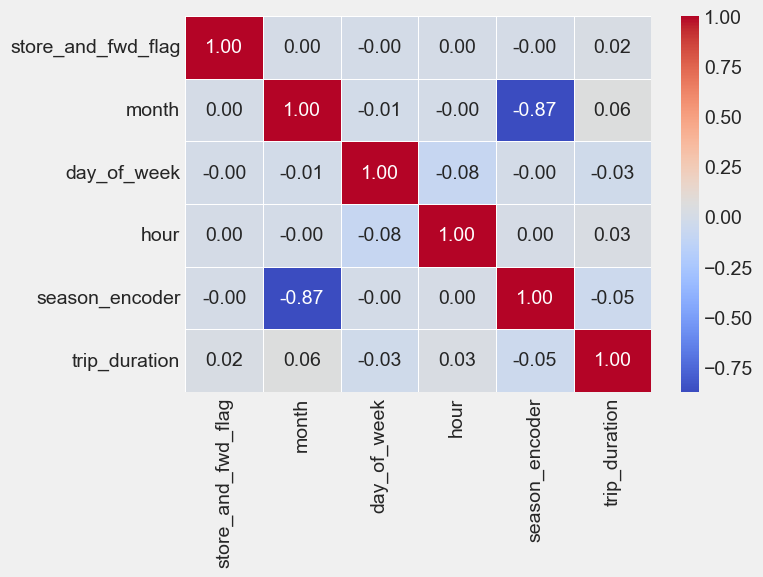

In [253]:
matrix = df[['store_and_fwd_flag','month','day_of_week','hour','season_encoder','trip_duration']]

corr_matrix = matrix.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()

In [254]:
df.drop(columns='day_name',axis=1, inplace=True)

In [255]:
corr_matrix = df.corr()

target_corr = corr_matrix.iloc[:,8].reset_index().sort_values(by='trip_duration', ascending=False)
print(target_corr.head(7), end='\n\n')

print(target_corr.tail(6))


                 index  trip_duration
8        trip_duration       1.000000
9    log_trip_duration       0.901388
10  haversine_distance       0.764992
5    dropoff_longitude       0.154214
3     pickup_longitude       0.140546
1      pickup_datetime       0.057195
11               month       0.055823

               index  trip_duration
2    passenger_count       0.022042
0          vendor_id       0.011101
12       day_of_week      -0.032152
14    season_encoder      -0.052976
4    pickup_latitude      -0.153439
6   dropoff_latitude      -0.160150


In [256]:
df.drop(columns='log_trip_duration', axis=1, inplace=True)

- Original train_val contain 10 features and 1229319 examples
- drop `id` uselss feature 
- data are clean and just 6 dublicate examples 
- target feature
    - before remove outlier, very high skewness, upnormal plot
    - after remove outlier, the data in normal range, and almost guassian plot
- most of the passengers are 1 and 2 but there high outlier like 7 and 8
- we calculate haversine distance from longitude&latitude and got very good correlation with target feature 
- from datetime feature varation
    - Friday and Saturday is the most days that there are trips counts
    - most of the trips are after hour 18 (may be because this is after the working time)
    - other variations are not so important


- the top 8 features with target are [`haversine_distance`,`dropoff_longitude`,  `pickup_longitude`,`pickup_datetime`,`month`,`dropoff_latitude`,  `pickup_latitude`,`season_encoder`]  
